In [3]:
import pandas as pd
import seaborn as sb


Populating the interactive namespace from numpy and matplotlib


# Load CSV file into memory

In [4]:
df = pd.read_csv('uber-raw-data.csv')

In [5]:
df.head(4)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512


Convert string Date/Time into timestamp using map() and to_datetime

In [6]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

In [7]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


Create function to return day of month

In [8]:
def get_dom(date_time):
    return date_time.day
df['Day of month'] = df['Date/Time'].map(get_dom)

In [9]:
df.head()

,Date/Time,Lat,Lon,Base,Day of month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [ ]:
def get_weekday(date_time):
    return date_time.weekday()
df['Week day'] = df['Date/Time'].map(get_weekday)

def get_hour(date_time):
    return date_time.hour
df['Hour'] = df['Date/Time'].map(get_hour)


In [108]:
df.iloc[3000:3005]

,Date/Time,Lat,Lon,Base,Day of month,Week day,Hour
3000,2014-04-03 15:59:00,40.7621,-73.9734,B02512,3,3,15
3001,2014-04-03 15:59:00,40.7727,-73.8857,B02512,3,3,15
3002,2014-04-03 15:59:00,40.7288,-73.9804,B02512,3,3,15
3003,2014-04-03 15:59:00,40.7516,-74.0057,B02512,3,3,15
3004,2014-04-03 16:01:00,40.7502,-74.0038,B02512,3,3,16


# Analysic

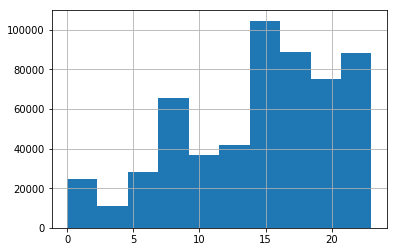

In [109]:
df.Hour.hist()

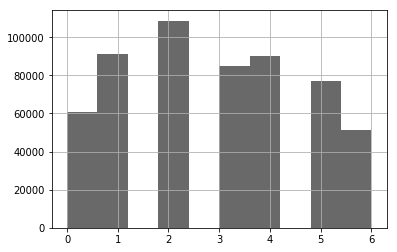

In [110]:
df['Week day'].hist(color='dimgrey')

Text(0.5,1,'Frequency by Day of month Uber')

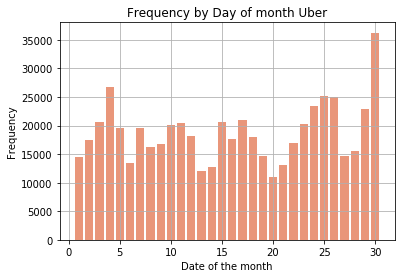

In [111]:
from matplotlib import pyplot as plt

df['Day of month'].hist(bins=30, rwidth = .8, range=(.5,30.5),color='darksalmon')
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by Day of month Uber')

In [112]:
for k, rows in df.groupby('Week day'):
    print(k,len(rows))

0 60861
1 91185
2 108631
3 85067
4 90303
5 77218
6 51251


In [113]:
# for k, rows in df.groupby('Week day'):
#     print(k,rows)

Similar way using function

In [114]:
def count_row(rows):
    return len(rows)

by_date = df.groupby('Day of month').apply(count_row)

In [115]:
by_date

Day of month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

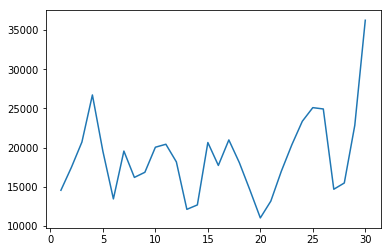

In [116]:
plt.plot(by_date)

Text(0.5,1,'Frequency by Day of month Uber')

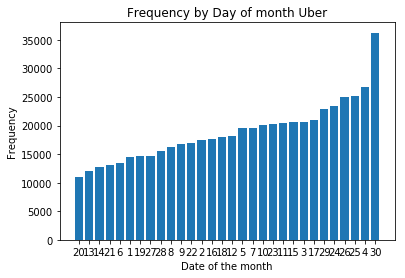

In [117]:
by_date_sorted = by_date.sort_values()
plt.xticks(range(1,31),by_date_sorted.index)
plt.bar(range(1,31),by_date_sorted)
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by Day of month Uber')

''

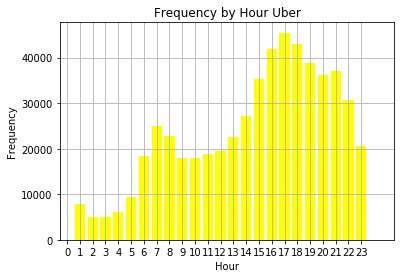

In [118]:
df['Hour'].hist(bins= 24, rwidth = .8, range=(.5,24.5), color='yellow')
plt.xticks(range(0,24))
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency by Hour Uber')
;

''

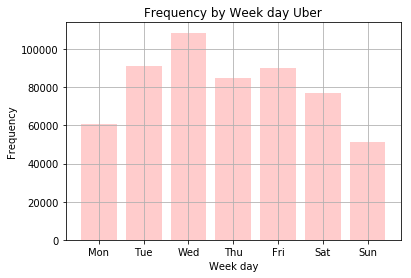

In [83]:
df['Week day'].hist(bins= 7, rwidth = .8, range=(-.5,6.5), color='red', alpha = .2)
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel('Week day')
plt.ylabel('Frequency')
plt.title('Frequency by Week day Uber')
;

In [119]:
df.groupby(['Hour','Week day']).apply(count_row).unstack()

Week day,0,1,2,3,4,5,6
Hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


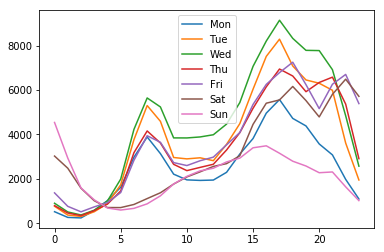

In [120]:
by_hour_weekday = df.groupby(['Hour','Week day']).apply(count_row).unstack()
plt.plot(by_hour_weekday)
plt.legend(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

In [91]:
df.groupby(['Week day','Hour']).apply(count_row).unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week day,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


# Change  Value in weekday 

In [121]:
week_day=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
  df.loc[df['Week day']==i, 'Week day']=week_day[i]  


In [122]:
df.iloc[3000:3005]

,Date/Time,Lat,Lon,Base,Day of month,Week day,Hour
3000,2014-04-03 15:59:00,40.7621,-73.9734,B02512,3,Thu,15
3001,2014-04-03 15:59:00,40.7727,-73.8857,B02512,3,Thu,15
3002,2014-04-03 15:59:00,40.7288,-73.9804,B02512,3,Thu,15
3003,2014-04-03 15:59:00,40.7516,-74.0057,B02512,3,Thu,15
3004,2014-04-03 16:01:00,40.7502,-74.0038,B02512,3,Thu,16


In [125]:
df.groupby(['Week day','Hour']).apply(count_row).unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week day,,,,,,,,,,,,,,,,,,,,,
Fri,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
Mon,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
Sat,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
Sun,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018
Thu,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
Tue,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
Wed,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571


In [126]:
by_week_hour = df.groupby(['Week day','Hour']).apply(count_row).unstack()

# Reindex after changing name of index

In [1]:
by_week_hour = by_week_hour.reindex(week_day)
by_week_hour

NameError: name 'by_week_hour' is not defined

# Seaborn applied to visualize data

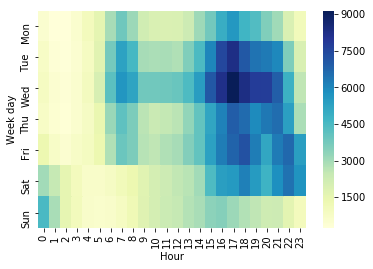

In [132]:
sb.heatmap(by_week_hour,cmap="YlGnBu")


# By Lat and Lon

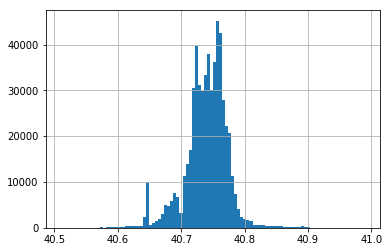

In [136]:
df['Lat'].hist(bins = 100, range= (40.51,40.99))

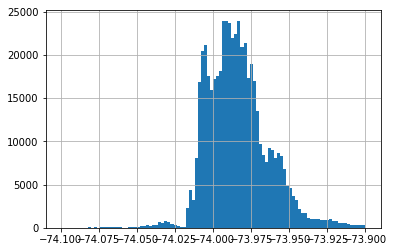

In [138]:
df['Lon'].hist(bins = 100, range= (-74.1,-73.9))

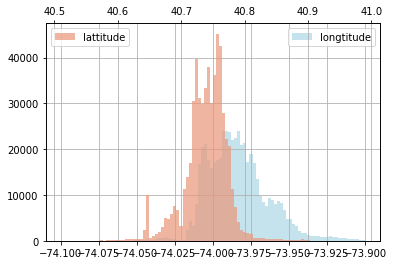

In [158]:
df['Lon'].hist(bins = 100, range= (-74.1,-73.9), color='lightblue',alpha=0.7,label='longtitude')
plt.legend()
plt.twiny()
df['Lat'].hist(bins = 100, range= (40.51,40.99),color='darksalmon',alpha=0.7,label='lattitude')
plt.legend(loc='upper left')

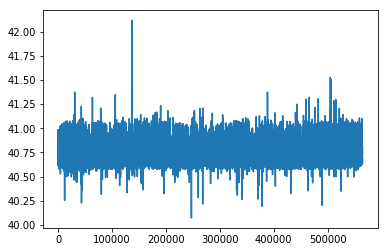

In [160]:
plt.plot(df['Lat'])

(0, 150)

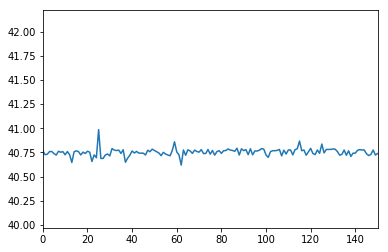

In [166]:
plt.plot(df['Lat'])
plt.xlim(0,150)

(0, 100)

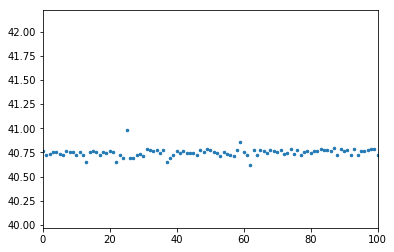

In [170]:
plt.plot(df['Lat'],'.',ms=5)
plt.xlim(0,100)

(0, 50)

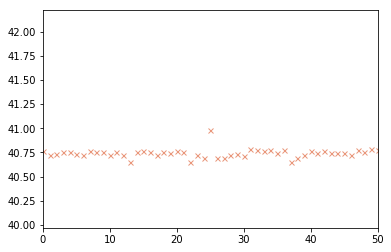

In [172]:
plt.plot(df['Lat'],'x',ms=5,color='darksalmon')
plt.xlim(0,50)

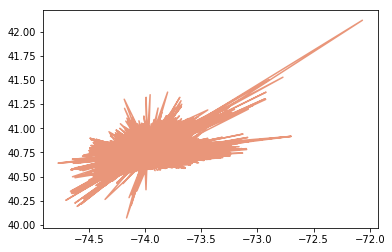

In [174]:
plt.plot(df['Lon'],df['Lat'],color='darksalmon')

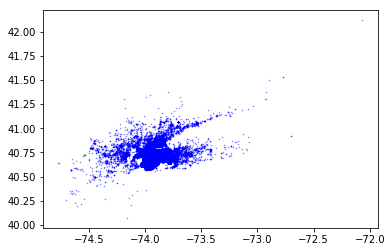

In [178]:
plt.plot(df['Lon'],df['Lat'],'.',ms=1,color='blue',alpha=0.5)

(40.7, 41)

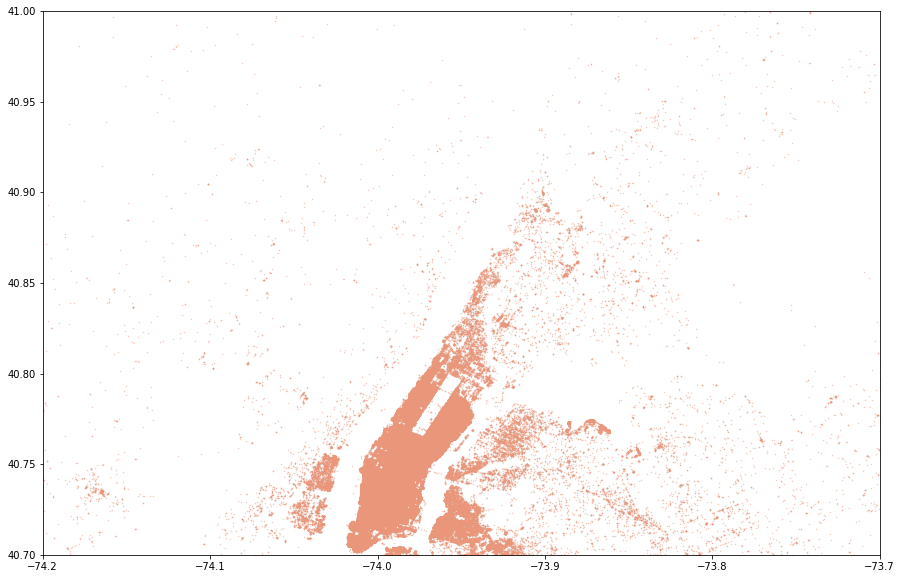

In [189]:
plt.figure(figsize=[15,10])
plt.plot(df['Lon'],df['Lat'],'.',ms=1,color='darksalmon',alpha=0.5)
plt.xlim(-74.2,-73.7)
plt.ylim(40.7,41)